In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

In [ ]:
# Downloading del dataset
url_dataset = 'https://raw.githubusercontent.com/bonsai-lab-polimi/tnsm2024-data-centric/main/dataset_TNSM_06995_v2.csv'
data = pd.read_csv(url_dataset)

# Descrizione del dataset
print("Dataset Description:\n", data.describe())
print("Class Distribution:\n", data['label'].value_counts())

Dataset Description:
        alarm_0      alarm_1  alarm_2      alarm_3  alarm_4  alarm_5  alarm_6  \
count   1669.0  1669.000000   1669.0  1669.000000   1669.0   1669.0   1669.0   
mean       0.0    51.149790      0.0   200.959257      0.0      0.0      0.0   
std        0.0   204.292011      0.0   370.472581      0.0      0.0      0.0   
min        0.0     0.000000      0.0     0.000000      0.0      0.0      0.0   
25%        0.0     0.000000      0.0     0.000000      0.0      0.0      0.0   
50%        0.0     0.000000      0.0     0.000000      0.0      0.0      0.0   
75%        0.0     0.000000      0.0     0.000000      0.0      0.0      0.0   
max        0.0   900.000000      0.0   900.000000      0.0      0.0      0.0   

       alarm_7      alarm_8      alarm_9  ...  alarm_155    alarm_156  \
count   1669.0  1669.000000  1669.000000  ...     1669.0  1669.000000   
mean       0.0    27.455962     3.756741  ...        0.0   267.715398   
std        0.0   153.844771    55.3463

In [ ]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset, random_split

# Separazione feature (X) dal target (y)
X = data.drop('label', axis=1).values
y = data['label'].values

# Standardizzazione delle feature
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Conversione in tensori PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Creazione di un dataset di tensori e suddivisione in training, validation e test set
dataset = TensorDataset(X_tensor, y_tensor)

train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Crearzione DataLoader per training, validation e test set
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch.nn.functional as F

# Definizione modello della rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)
        self.batch_norm3 = nn.BatchNorm1d(128)
        self.batch_norm4 = nn.BatchNorm1d(64)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.batch_norm1(x)
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.batch_norm2(x)
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.batch_norm3(x)
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.batch_norm4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        return x



In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)  # Aumentato a 1024 neuroni
        self.fc2 = nn.Linear(1024, 512)        # Aumentato a 512 neuroni
        self.fc3 = nn.Linear(512, 256)         # Aumentato a 256 neuroni
        self.fc4 = nn.Linear(256, 128)         # Aumentato a 128 neuroni
        self.fc5 = nn.Linear(128, num_classes) # Numero di classi invariato
        self.dropout = nn.Dropout(0.5)
        self.batch_norm1 = nn.BatchNorm1d(1024)
        self.batch_norm2 = nn.BatchNorm1d(512)
        self.batch_norm3 = nn.BatchNorm1d(256)
        self.batch_norm4 = nn.BatchNorm1d(128)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.batch_norm1(x)
        x = self.dropout(x)

        x = F.relu(self.fc2(x))
        x = self.batch_norm2(x)
        x = self.dropout(x)

        x = F.relu(self.fc3(x))
        x = self.batch_norm3(x)
        x = self.dropout(x)

        x = F.relu(self.fc4(x))
        x = self.batch_norm4(x)
        x = self.dropout(x)

        x = self.fc5(x)
        return x

In [ ]:
import torch.optim as optim

# Iperparametri
input_size = X.shape[1]
num_classes = 4
num_epochs = 50
learning_rate = 10e-4

# Inizializzazione di modello, loss function e ottimizzatore Adam
model = NeuralNetwork(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training history (Utilizzato per plottare poi loss e accuracy)
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []


In [ ]:
# Funzione di addestramento del modello
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    # Training history (Utilizzato per plottare poi loss e accuracy)
    train_loss_history.clear()
    train_acc_history.clear()
    val_loss_history.clear()
    val_acc_history.clear()

    # Best validation accuracy and test accuracy at best validation accuracy
    best_val_accuracy = 0
    test_accuracy_at_best_val = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = correct / total

        # Append training history
        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_accuracy)

        # Validation
        val_loss = 0.0
        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = correct / total

        # Append validation history
        val_loss_history.append(val_loss)
        val_acc_history.append(val_accuracy)

        # Check if this is the best validation accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Loss: {epoch_loss:.4f}, Acc: {epoch_accuracy:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, '
              f'Best Val Acc: {best_val_accuracy:.4f}')


In [ ]:
# Chiamata alla funzione di addestramento
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs)


Epoch [1/50], Loss: 0.9997, Acc: 0.6130, Val Loss: 0.4508, Val Acc: 0.8760, Best Val Acc: 0.8760
Epoch [2/50], Loss: 0.4794, Acc: 0.8330, Val Loss: 0.3198, Val Acc: 0.9000, Best Val Acc: 0.9000
Epoch [3/50], Loss: 0.3881, Acc: 0.8699, Val Loss: 0.2847, Val Acc: 0.9160, Best Val Acc: 0.9160
Epoch [4/50], Loss: 0.3325, Acc: 0.8913, Val Loss: 0.3027, Val Acc: 0.9040, Best Val Acc: 0.9160
Epoch [5/50], Loss: 0.2827, Acc: 0.9058, Val Loss: 0.2439, Val Acc: 0.9280, Best Val Acc: 0.9280
Epoch [6/50], Loss: 0.2526, Acc: 0.9144, Val Loss: 0.2202, Val Acc: 0.9360, Best Val Acc: 0.9360
Epoch [7/50], Loss: 0.2243, Acc: 0.9255, Val Loss: 0.2294, Val Acc: 0.9200, Best Val Acc: 0.9360
Epoch [8/50], Loss: 0.2430, Acc: 0.9075, Val Loss: 0.2265, Val Acc: 0.9280, Best Val Acc: 0.9360
Epoch [9/50], Loss: 0.2081, Acc: 0.9307, Val Loss: 0.2582, Val Acc: 0.9280, Best Val Acc: 0.9360
Epoch [10/50], Loss: 0.2098, Acc: 0.9349, Val Loss: 0.2180, Val Acc: 0.9280, Best Val Acc: 0.9360
Epoch [11/50], Loss: 0.2125, 

In [ ]:
# Funzione per creare grafici della loss
def plot_loss(train_loss_history, val_loss_history):
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Validation Loss')
    plt.show()

# Funzione per creare grafici dell'accuratezza
def plot_accuracy(train_acc_history, val_acc_history):
    plt.figure(figsize=(10, 5))
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Train vs Validation Accuracy')
    plt.show()

In [ ]:
len(train_loss_history)

50

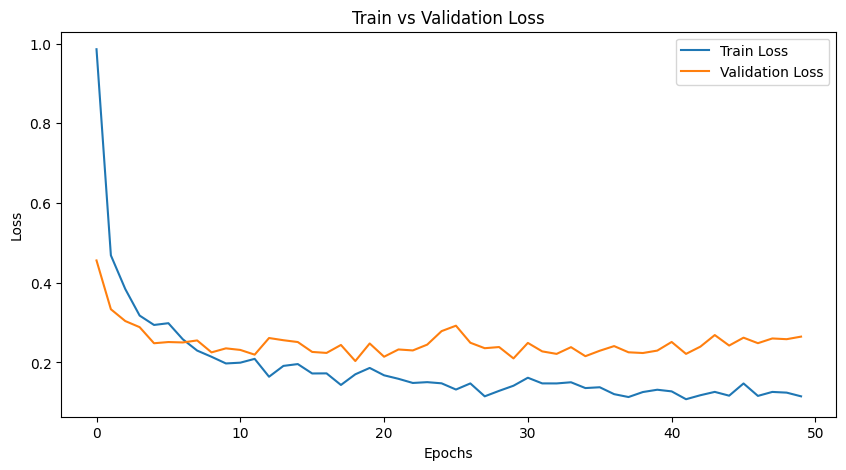

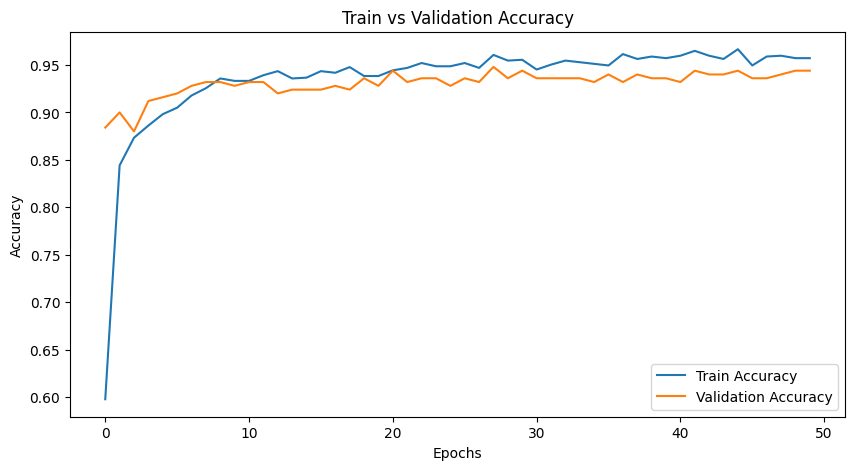

In [ ]:
# Plot the loss and accuracy
plot_loss(train_loss_history, val_loss_history)
plot_accuracy(train_acc_history, val_acc_history)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Funzione di valutazione
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

# Valutare il modello
true_labels, predicted_labels = evaluate_model(model, test_loader)
# Report di classificazione
print(classification_report(true_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94        64
           1       0.98      0.93      0.95       102
           2       0.79      0.86      0.83        22
           3       0.91      0.97      0.94        63

    accuracy                           0.94       251
   macro avg       0.91      0.93      0.92       251
weighted avg       0.94      0.94      0.94       251



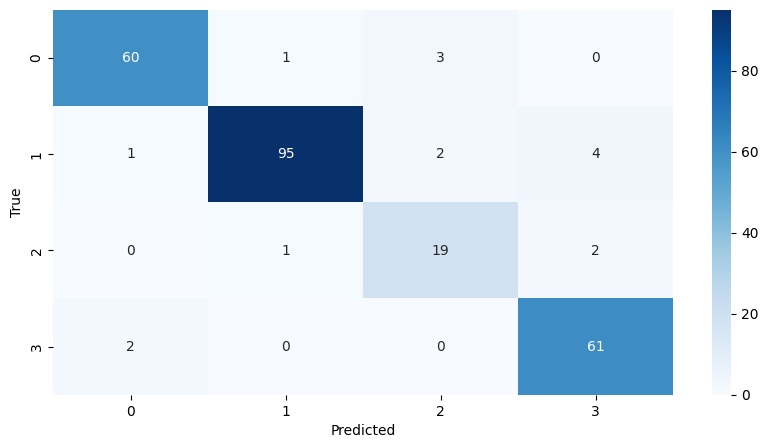

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()